In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/fitness_class_2212.csv')

In [4]:
df.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


In [5]:
df.shape

(1500, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


In [7]:
df = df.drop(columns='booking_id', axis=1)

In [8]:
df.isnull().sum()

months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

In [9]:
weight_mean = df['weight'].mean()
df['weight'].fillna(weight_mean, inplace=True)

In [10]:
df.isnull().sum()

months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64

In [11]:
cat_col = []
num_col = []

for col in df.columns:
    if df[col].dtype == 'object':
        cat_col.append(col)
    else:
        num_col.append(col)

In [12]:
for col in cat_col:
    print(f'{col} :', df[col].unique())

days_before : ['8' '2' '14' '10' '6' '4' '9' '12' '5' '3' '7' '13' '12 days' '20' '1'
 '15' '6 days' '11' '13 days' '3 days' '16' '1 days' '7 days' '8 days'
 '10 days' '14 days' '17' '5 days' '2 days' '4 days' '29']
day_of_week : ['Wed' 'Mon' 'Sun' 'Fri' 'Thu' 'Wednesday' 'Fri.' 'Tue' 'Sat' 'Monday']
time : ['PM' 'AM']
category : ['Strength' 'HIIT' 'Cycling' 'Yoga' '-' 'Aqua']


In [13]:
for i, element in enumerate(df['days_before']):
    df['days_before'][i] = element.replace('days', '')

<ipython-input-13-2c55e207d108>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_before'][i] = element.replace('days', '')


In [14]:
df['day_of_week'] = df['day_of_week'].replace('Wednesday', 'Wed')
df['day_of_week'] = df['day_of_week'].replace('Fri.', 'Fri')
df['day_of_week'] = df['day_of_week'].replace('Monday', 'Mon')

In [15]:
for col in cat_col:
    print(f'{col} :', df[col].unique())

days_before : ['8' '2' '14' '10' '6' '4' '9' '12' '5' '3' '7' '13' '12 ' '20' '1' '15'
 '6 ' '11' '13 ' '3 ' '16' '1 ' '7 ' '8 ' '10 ' '14 ' '17' '5 ' '2 ' '4 '
 '29']
day_of_week : ['Wed' 'Mon' 'Sun' 'Fri' 'Thu' 'Tue' 'Sat']
time : ['PM' 'AM']
category : ['Strength' 'HIIT' 'Cycling' 'Yoga' '-' 'Aqua']


In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
label_encoding = {}

In [18]:
for col in cat_col:
    label_encoding[col] = LabelEncoder()
    df[col] = label_encoding[col].fit_transform(df[col])

In [19]:
df.head()

,months_as_member,weight,days_before,day_of_week,time,category,attended
0,17,79.56,28,6,1,4,0
1,10,79.01,14,1,0,3,0
2,16,74.53,9,3,0,4,0
3,5,86.12,2,0,0,2,0
4,15,69.29,28,4,0,3,0


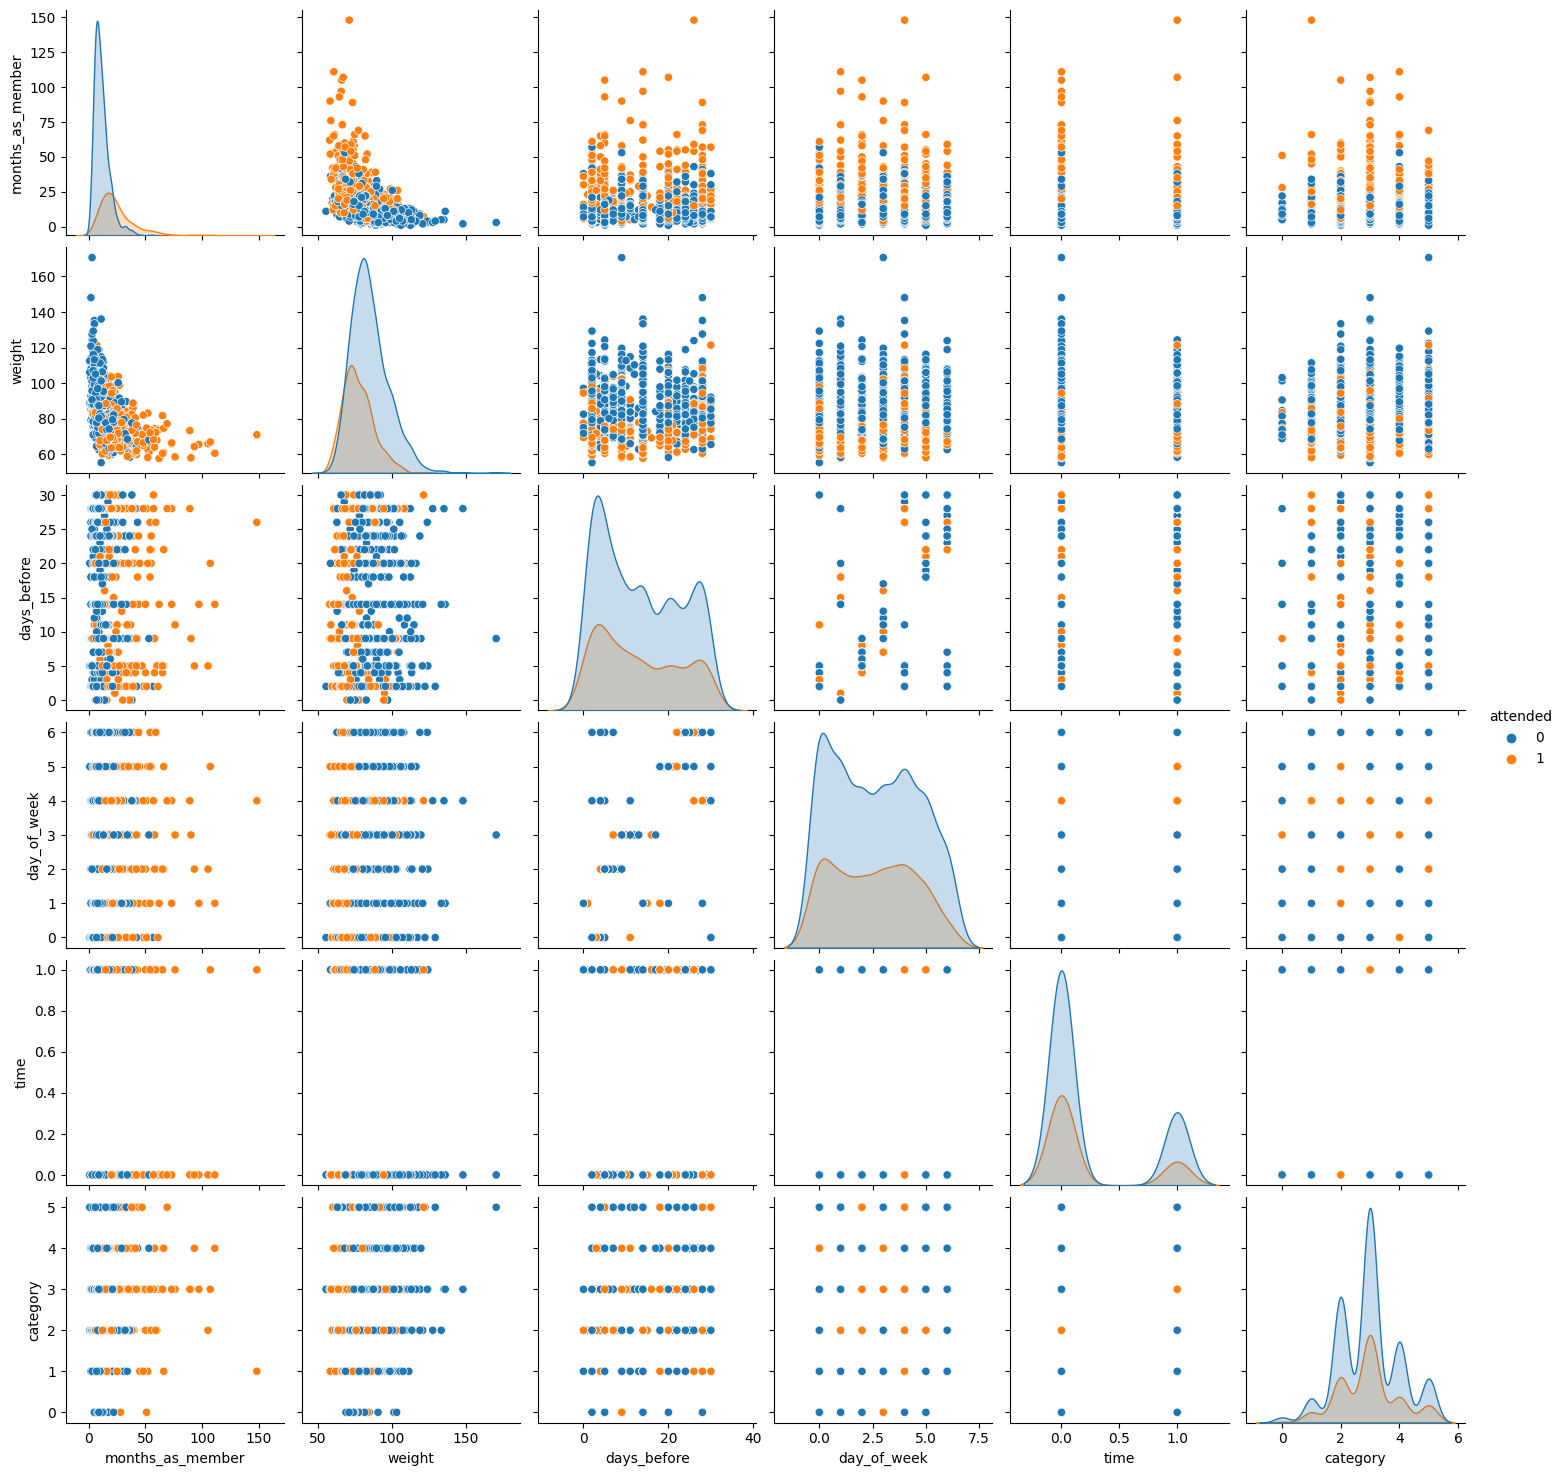

In [20]:
sns.pairplot(data=df, hue='attended')
plt.show()

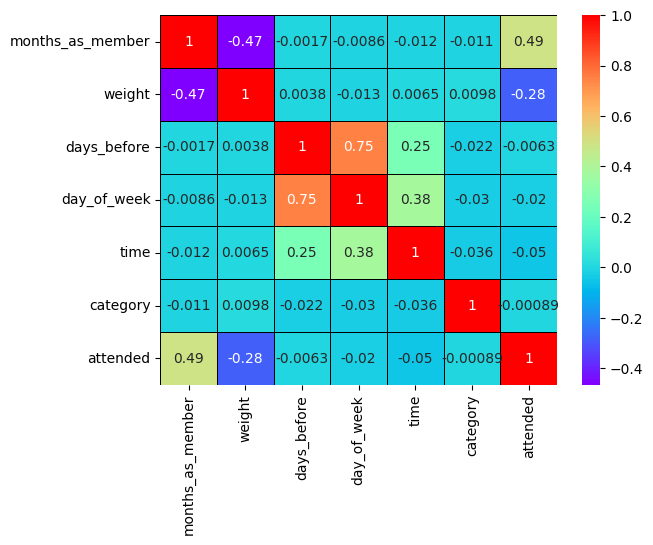

In [21]:
sns.heatmap(df.corr(), cmap='rainbow', annot=True, linecolor='black', linewidths=0.5)
plt.show()

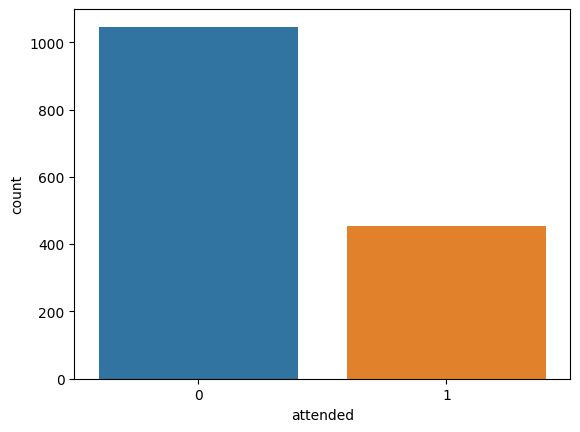

In [22]:
sns.countplot(data=df, x='attended')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df.iloc[:,:-1]
X

,months_as_member,weight,days_before,day_of_week,time,category
0,17,79.56,28,6,1,4
1,10,79.01,14,1,0,3
2,16,74.53,9,3,0,4
3,5,86.12,2,0,0,2
4,15,69.29,28,4,0,3
...,...,...,...,...,...,...
1495,21,79.51,2,0,0,3
1496,29,89.55,14,1,0,4
1497,9,87.38,20,5,0,3
1498,34,68.64,9,3,0,1


In [25]:
y = df['attended']
y

0       0
1       0
2       0
3       0
4       0
       ..
1495    0
1496    0
1497    0
1498    0
1499    1
Name: attended, Length: 1500, dtype: int64

In [26]:
from imblearn.over_sampling import RandomOverSampler

In [27]:
resamp = RandomOverSampler()

In [28]:
tempX, tempy = resamp.fit_resample(X, y)

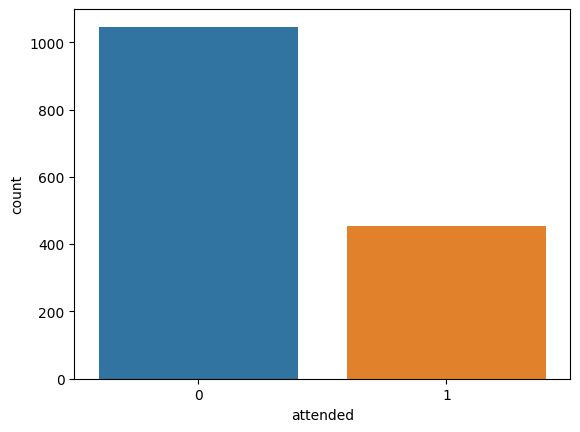

In [29]:
sns.countplot(data=df, x=y)
plt.show()

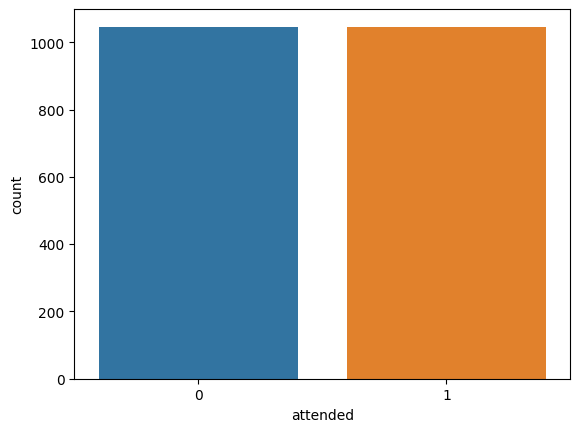

In [30]:
sns.countplot(data=df, x=tempy)
plt.show()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(tempX, tempy, test_size=0.2, random_state=0)

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
RNF = RandomForestClassifier()

In [34]:
RNF.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
y_hat = RNF.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [37]:
accuracy_score(y_test, y_hat)

0.8854415274463007

In [38]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       214
           1       0.85      0.93      0.89       205

    accuracy                           0.89       419
   macro avg       0.89      0.89      0.89       419
weighted avg       0.89      0.89      0.89       419



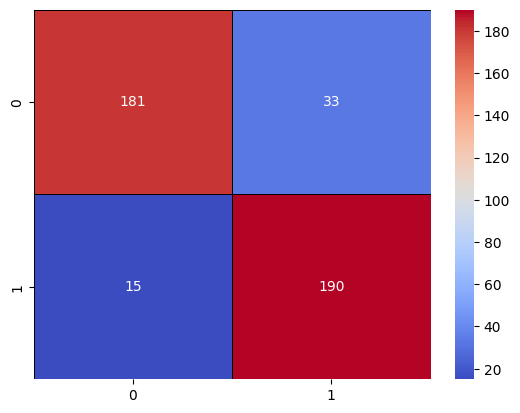

In [39]:
sns.heatmap(confusion_matrix(y_test, y_hat), cmap='coolwarm', fmt='.3g',linecolor='black', annot=True, linewidths=0.5)
plt.show()